In [ ]:
!pip install met_brewer
import pandas as pd
import seaborn as sns
import met_brewer
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import plotly.express as px

In [ ]:
chris_data = pd.read_csv('class_spotify_data_lab_o3_filled.csv')
chris_data = chris_data.rename(columns={"genre": "Genre"})
chris_data = chris_data.rename(columns={"added_by": "Added by"})
chris_data

,track,artist,Genre,Added by
0,Emergence,Sleep Token,progressive metal; metalcore,jonathan pipping
1,Guess Who's Back,Rakim,east coast hip hop; old school hip hop; hip hop,jonathan pipping
2,Ventura Highway,America,yacht rock; soft rock; folk rock,Matt
3,Reelin' In The Years,Steely Dan,yacht rock; classic rock,Matt
4,Do It Again,Steely Dan,yacht rock; classic rock,Matt
...,...,...,...,...
316,L’enfer,Stromae,french pop,hisayswhy
317,Write This Down,George Strait,country; classic country; traditional country;...,Matt
318,Check Yes Or No,George Strait,country; classic country; traditional country;...,Matt
319,Here For A Good Time,George Strait,country; classic country; traditional country;...,Matt


# New Section

In [ ]:
my_data = pd.read_csv('summer_lab_25.csv')
my_data.head()
my_data = my_data.rename(columns={"Track Name": "track"})
my_data

,Track URI,track,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Explicit,Added By,Added At,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,spotify:track:2OMjHcniFxzijWX7EaBrXE,Emergence,Even In Arcadia,Sleep Token,2025-05-09,386253,82,False,214qkq34k3edqic6jhuqmi3wy,2025-06-02T22:15:36Z,...,4,-6.729,0,0.0351,0.0225,0.000076,0.0826,0.163,126.106,4
1,spotify:track:5czjjnbTatyFal33a9h1aN,Guess Who's Back,The 18th Letter / The Book Of Life,Rakim,1996-11-04,250906,60,False,214qkq34k3edqic6jhuqmi3wy,2025-06-03T21:18:58Z,...,6,-7.456,0,0.2620,0.0153,0.000000,0.1060,0.692,94.016,4
2,spotify:track:4IU1RL4BKvFyXtbTwaHAvW,Ventura Highway,Homecoming,"America,George Martin",1972-01-01,211680,82,False,ygwo55xi4l913tsk1yty16vnp,2025-06-04T19:52:08Z,...,2,-5.929,1,0.0283,0.1040,0.000200,0.1220,0.838,130.705,4
3,spotify:track:1x1XQqhBViz4opcpwc7FVs,Reelin' In The Years,Can't Buy A Thrill,Steely Dan,1972-11-01,277467,76,False,ygwo55xi4l913tsk1yty16vnp,2025-06-04T19:52:13Z,...,2,-17.340,1,0.0348,0.1540,0.000000,0.0878,0.723,134.976,4
4,spotify:track:2LXISHBkx8FyoxCBkckh19,Do It Again,Can't Buy A Thrill,Steely Dan,1972-11-01,357041,77,False,ygwo55xi4l913tsk1yty16vnp,2025-06-04T19:52:18Z,...,2,-15.180,0,0.0320,0.3430,0.000010,0.0711,0.941,124.588,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,spotify:track:1CsuHmKOfCYxPoO4xjlAWV,L’enfer,Multitude,Stromae,2022-03-03,189720,64,False,hisayswhy,2025-06-27T13:27:51Z,...,2,-8.381,0,0.1770,0.3300,0.000000,0.2410,0.606,177.595,4
317,spotify:track:1TanmIWbaUj5NVwJ3k4XPd,Write This Down,Always Never The Same,George Strait,1999-01-01,219600,75,False,ygwo55xi4l913tsk1yty16vnp,2025-06-27T13:29:34Z,...,3,-7.468,1,0.0264,0.1270,0.000009,0.2950,0.671,123.867,4
318,spotify:track:6iy4PoAuZBMvtrlDX4VxC7,Check Yes Or No,Strait Out Of The Box,George Strait,1995-09-12,200666,77,False,ygwo55xi4l913tsk1yty16vnp,2025-06-27T13:29:37Z,...,5,-12.644,1,0.0352,0.0551,0.000003,0.0371,0.691,111.480,4
319,spotify:track:11OFYsUK9EVJsQ6nutH32M,Here For A Good Time,Here For A Good Time,George Strait,2011-01-01,180266,72,False,ygwo55xi4l913tsk1yty16vnp,2025-06-27T13:29:46Z,...,6,-6.753,1,0.0369,0.0858,0.000006,0.1160,0.532,127.930,4


In [ ]:
df_merged = my_data.merge(
    chris_data[['Genre', 'Added by', 'track']],  # select only columns to update
    on='track',
    how='left',
    suffixes=('', '_new')
)

df_merged.columns

Index(['Track URI', 'track', 'Album Name', 'Artist Name(s)', 'Release Date',
       'Duration (ms)', 'Popularity', 'Explicit', 'Added By', 'Added At',
       'Genres', 'Record Label', 'Danceability', 'Energy', 'Key', 'Loudness',
       'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Time Signature', 'Genre', 'Added by'],
      dtype='object')

In [ ]:
df_merged_cleaned = df_merged.drop(['Genres', 'Added By'], axis = 1)
spotify_df = df_merged_cleaned.dropna()
spotify_df

,Track URI,track,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Explicit,Added At,Record Label,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Genre,Added by
0,spotify:track:2OMjHcniFxzijWX7EaBrXE,Emergence,Even In Arcadia,Sleep Token,2025-05-09,386253,82,False,2025-06-02T22:15:36Z,Sleep Token/RCA Records,...,0,0.0351,0.0225,0.000076,0.0826,0.163,126.106,4,progressive metal; metalcore,jonathan pipping
1,spotify:track:5czjjnbTatyFal33a9h1aN,Guess Who's Back,The 18th Letter / The Book Of Life,Rakim,1996-11-04,250906,60,False,2025-06-03T21:18:58Z,Universal Records,...,0,0.2620,0.0153,0.000000,0.1060,0.692,94.016,4,east coast hip hop; old school hip hop; hip hop,jonathan pipping
2,spotify:track:4IU1RL4BKvFyXtbTwaHAvW,Ventura Highway,Homecoming,"America,George Martin",1972-01-01,211680,82,False,2025-06-04T19:52:08Z,Warner Records,...,1,0.0283,0.1040,0.000200,0.1220,0.838,130.705,4,yacht rock; soft rock; folk rock,Matt
3,spotify:track:1x1XQqhBViz4opcpwc7FVs,Reelin' In The Years,Can't Buy A Thrill,Steely Dan,1972-11-01,277467,76,False,2025-06-04T19:52:13Z,Geffen,...,1,0.0348,0.1540,0.000000,0.0878,0.723,134.976,4,yacht rock; classic rock,Matt
4,spotify:track:2LXISHBkx8FyoxCBkckh19,Do It Again,Can't Buy A Thrill,Steely Dan,1972-11-01,357041,77,False,2025-06-04T19:52:18Z,Geffen,...,0,0.0320,0.3430,0.000010,0.0711,0.941,124.588,4,yacht rock; classic rock,Matt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,spotify:track:1CsuHmKOfCYxPoO4xjlAWV,L’enfer,Multitude,Stromae,2022-03-03,189720,64,False,2025-06-27T13:27:51Z,Universal Music Division Carthage Music,...,0,0.1770,0.3300,0.000000,0.2410,0.606,177.595,4,french pop,hisayswhy
323,spotify:track:1TanmIWbaUj5NVwJ3k4XPd,Write This Down,Always Never The Same,George Strait,1999-01-01,219600,75,False,2025-06-27T13:29:34Z,MCA Nashville,...,1,0.0264,0.1270,0.000009,0.2950,0.671,123.867,4,country; classic country; traditional country;...,Matt
324,spotify:track:6iy4PoAuZBMvtrlDX4VxC7,Check Yes Or No,Strait Out Of The Box,George Strait,1995-09-12,200666,77,False,2025-06-27T13:29:37Z,Geffen*,...,1,0.0352,0.0551,0.000003,0.0371,0.691,111.480,4,country; classic country; traditional country;...,Matt
325,spotify:track:11OFYsUK9EVJsQ6nutH32M,Here For A Good Time,Here For A Good Time,George Strait,2011-01-01,180266,72,False,2025-06-27T13:29:46Z,MCA Nashville,...,1,0.0369,0.0858,0.000006,0.1160,0.532,127.930,4,country; classic country; traditional country;...,Matt


In [ ]:
#spotify_df.to_csv('19_spotify-train.csv', index=False)

Preliminary EDA on dataset

Text(0.5, 0.98, 'Histograms of numeric features')

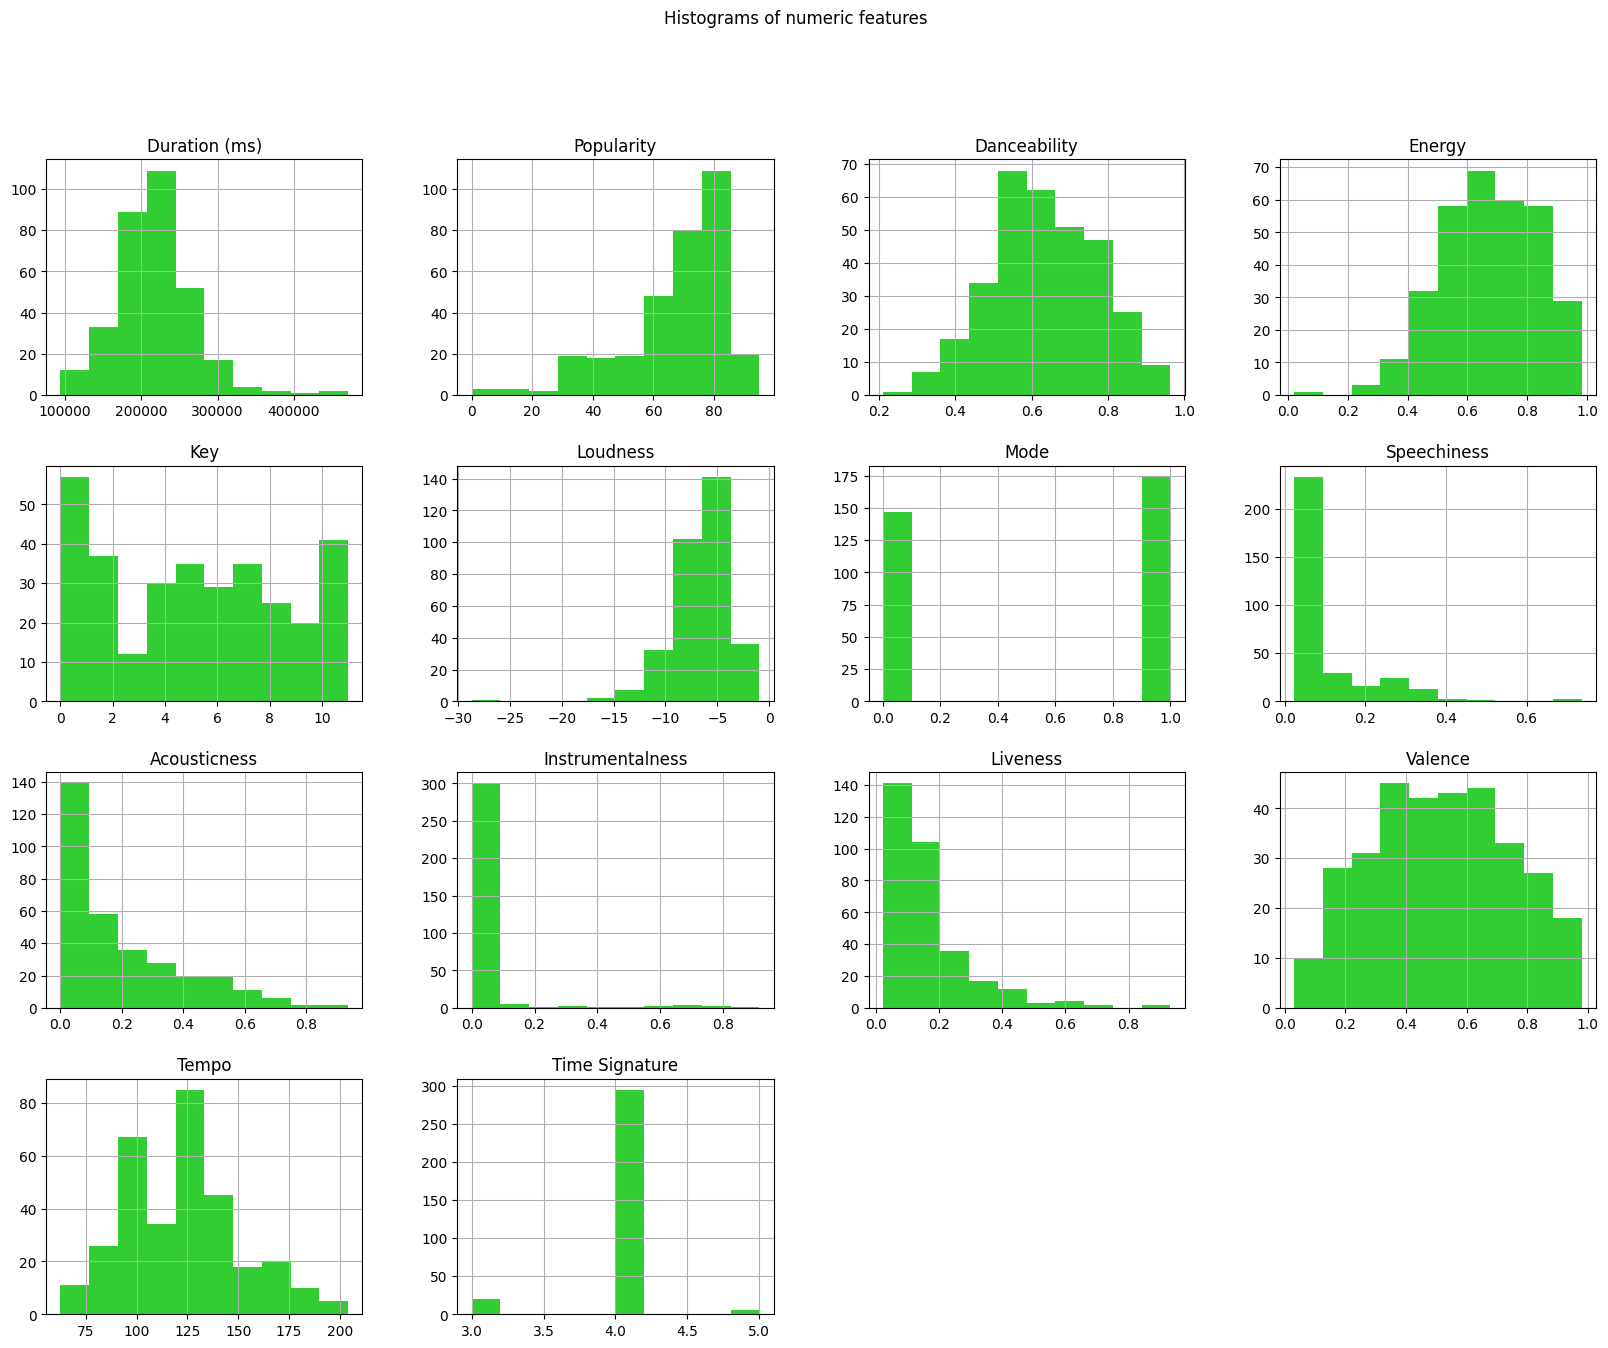

In [ ]:
spotify_df.hist(figsize=(20, 15), color = 'limegreen')
plt.suptitle('Histograms of numeric features')

#EDA

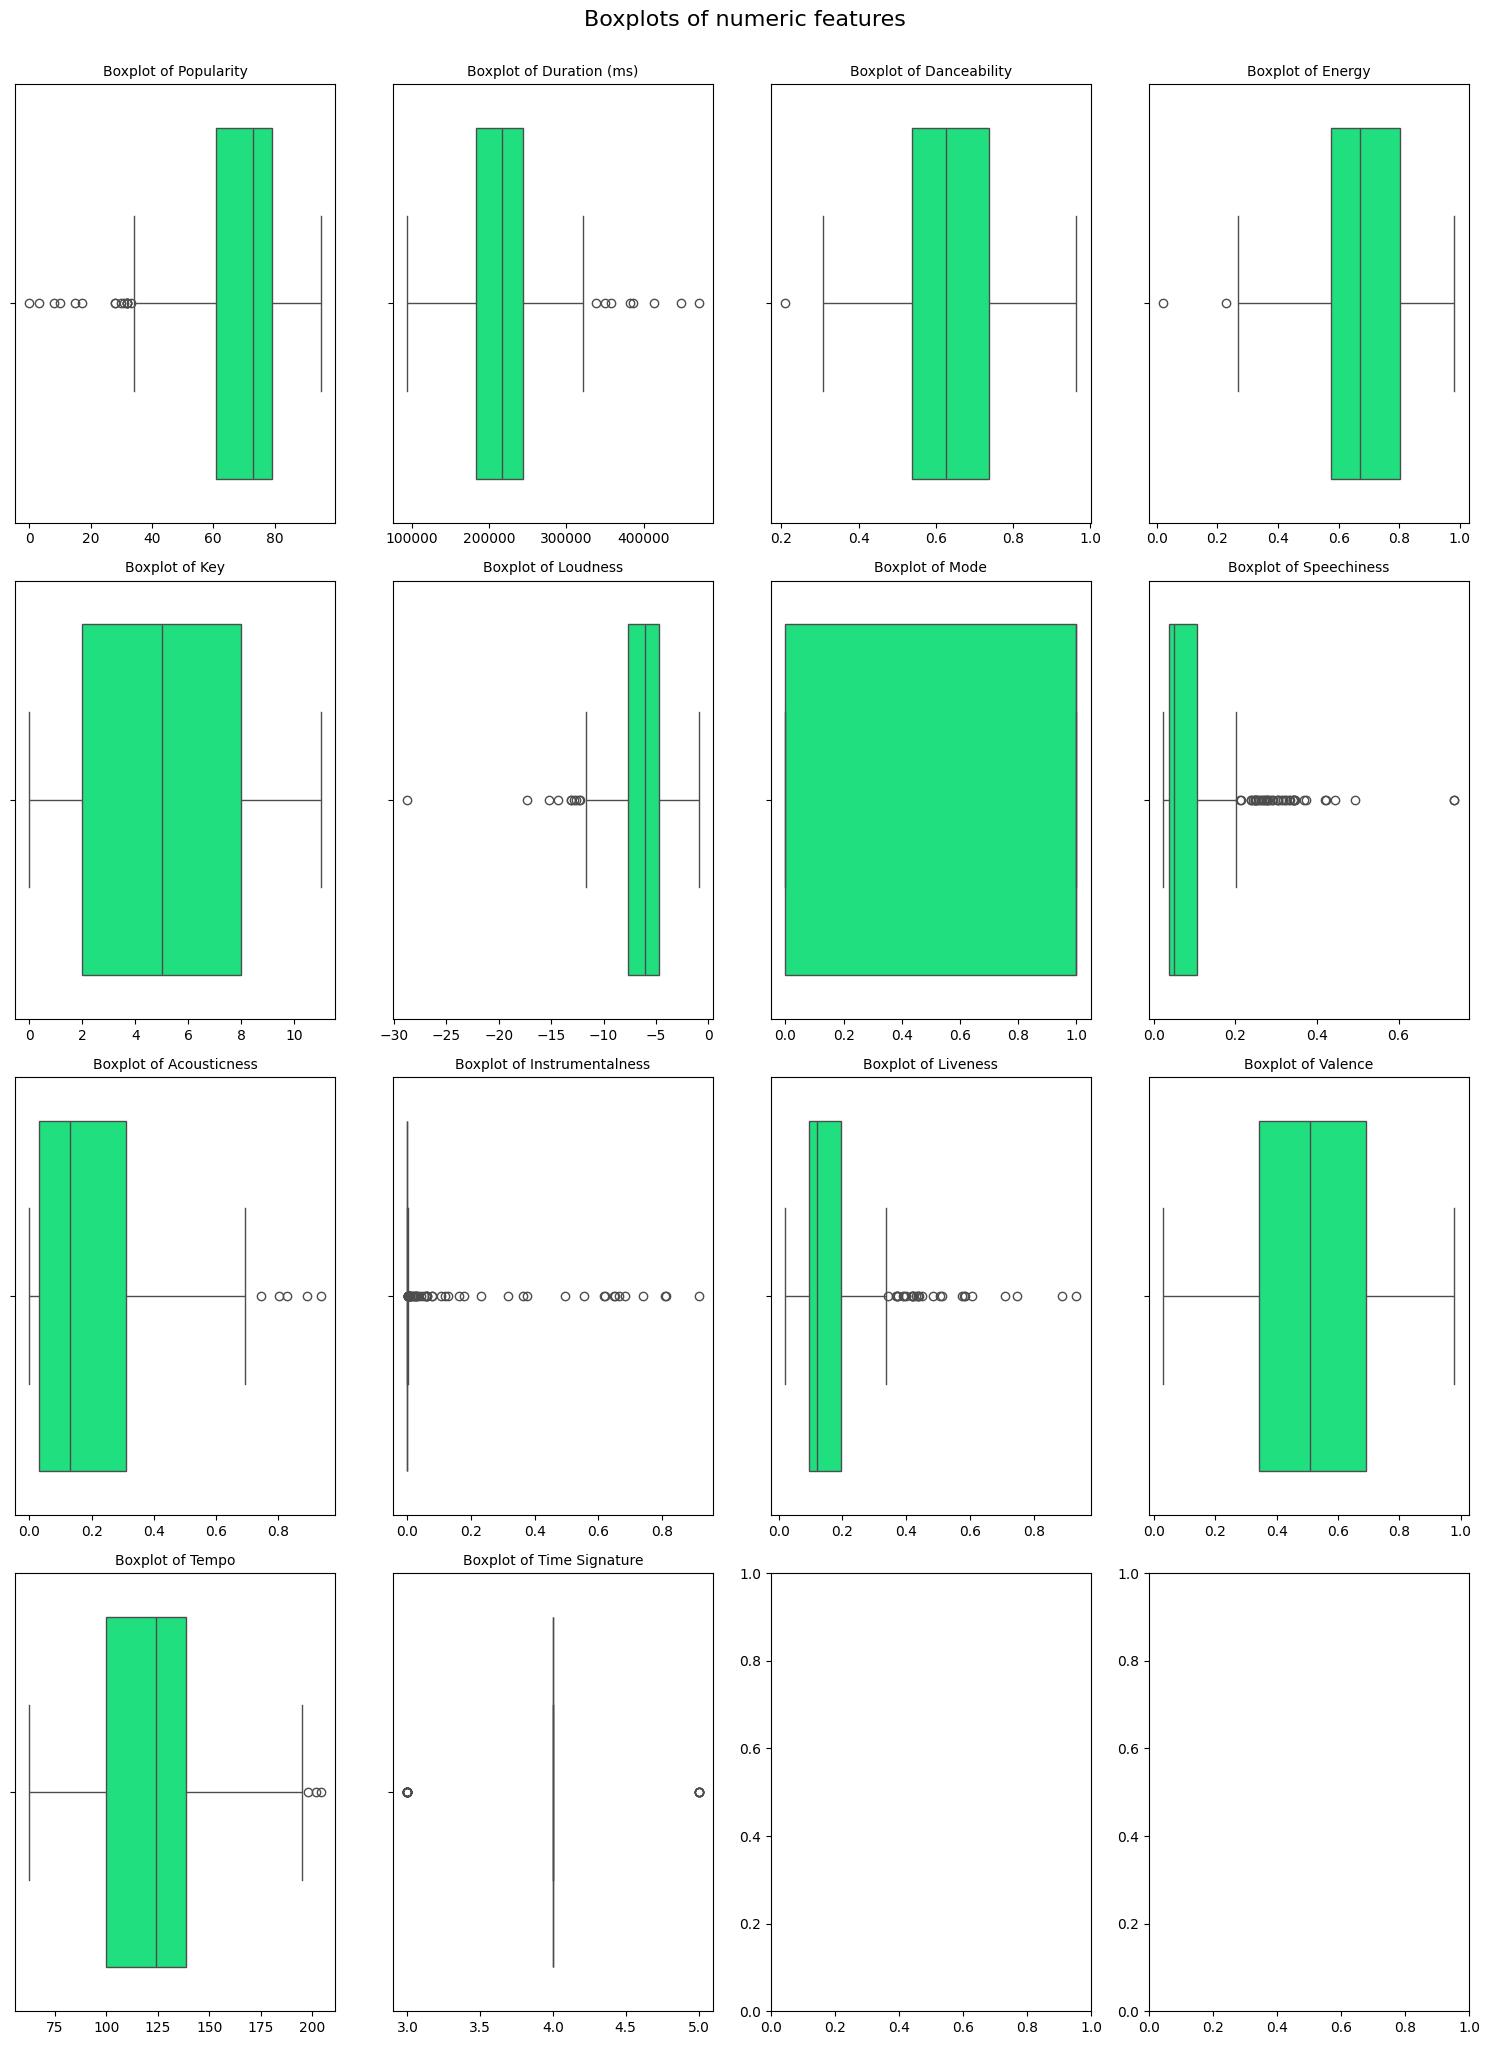

In [ ]:
numerical_features = ['Popularity','Duration (ms)','Danceability','Energy','Key','Loudness','Mode','Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo','Time Signature']
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 20))
axes = axes.flatten()
for i, c in enumerate(numerical_features):
    sns.boxplot(x=spotify_df[c], ax=axes[i], color='springgreen')
    axes[i].set_title(f'Boxplot of {c}', fontsize=10)
    axes[i].set_xlabel('')
plt.tight_layout()
plt.suptitle('Boxplots of numeric features', fontsize=16, y=1.02)
plt.show()

In [ ]:
spotify_df['Genre'] = spotify_df['Genre'].str.split(r';\s*')

spotify_genres = spotify_df.explode('Genre')
spotify_genres.head()

/tmp/ipython-input-284-1562206538.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Track URI,track,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Explicit,Added At,Record Label,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Genre,Added by
0,spotify:track:2OMjHcniFxzijWX7EaBrXE,Emergence,Even In Arcadia,Sleep Token,2025-05-09,386253,82,False,2025-06-02T22:15:36Z,Sleep Token/RCA Records,...,0,0.0351,0.0225,0.000076,0.0826,0.163,126.106,4,progressive metal,jonathan pipping
0,spotify:track:2OMjHcniFxzijWX7EaBrXE,Emergence,Even In Arcadia,Sleep Token,2025-05-09,386253,82,False,2025-06-02T22:15:36Z,Sleep Token/RCA Records,...,0,0.0351,0.0225,0.000076,0.0826,0.163,126.106,4,metalcore,jonathan pipping
1,spotify:track:5czjjnbTatyFal33a9h1aN,Guess Who's Back,The 18th Letter / The Book Of Life,Rakim,1996-11-04,250906,60,False,2025-06-03T21:18:58Z,Universal Records,...,0,0.2620,0.0153,0.000000,0.1060,0.692,94.016,4,east coast hip hop,jonathan pipping
1,spotify:track:5czjjnbTatyFal33a9h1aN,Guess Who's Back,The 18th Letter / The Book Of Life,Rakim,1996-11-04,250906,60,False,2025-06-03T21:18:58Z,Universal Records,...,0,0.2620,0.0153,0.000000,0.1060,0.692,94.016,4,old school hip hop,jonathan pipping
1,spotify:track:5czjjnbTatyFal33a9h1aN,Guess Who's Back,The 18th Letter / The Book Of Life,Rakim,1996-11-04,250906,60,False,2025-06-03T21:18:58Z,Universal Records,...,0,0.2620,0.0153,0.000000,0.1060,0.692,94.016,4,hip hop,jonathan pipping


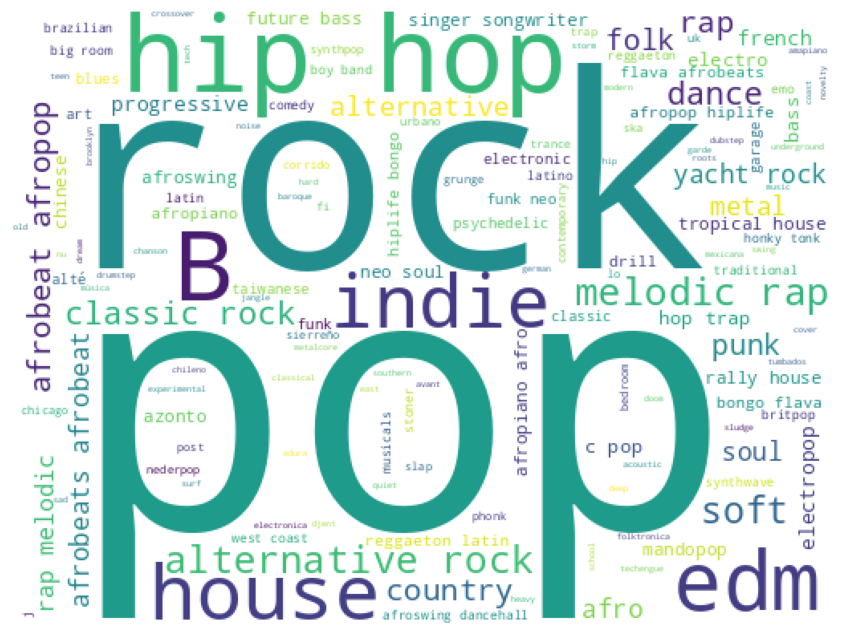

In [ ]:
plt.subplots(figsize = (20,8))
wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(spotify_genres["Genre"]))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

In [ ]:
spotify_grouped_df = spotify_genres.groupby('Genre').mean('Popularity').reset_index()
spotify_grouped_df = spotify_grouped_df.sort_values(by = 'Popularity', ascending = False)
fig = px.bar(spotify_grouped_df, x='Genre', y='Popularity',
             hover_data=['Danceability', 'Energy'], color='Danceability',
             labels = {'genre_real':'genre'},height=400)
fig.show()

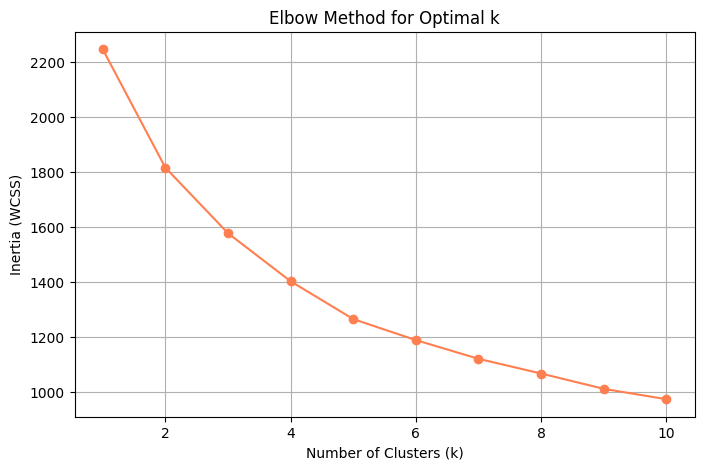

In [ ]:
from sklearn.cluster import KMeans

# Choosing the number of clusters and explicitly setting n_init to avoid random initialization repetitive warning
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans_features = spotify_df[['Danceability', 'Energy','Valence','Tempo', 'Loudness','Acousticness', 'Liveness']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(kmeans_features)

inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o', color = 'coral')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()

/tmp/ipython-input-288-2689020837.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-288-2689020837.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



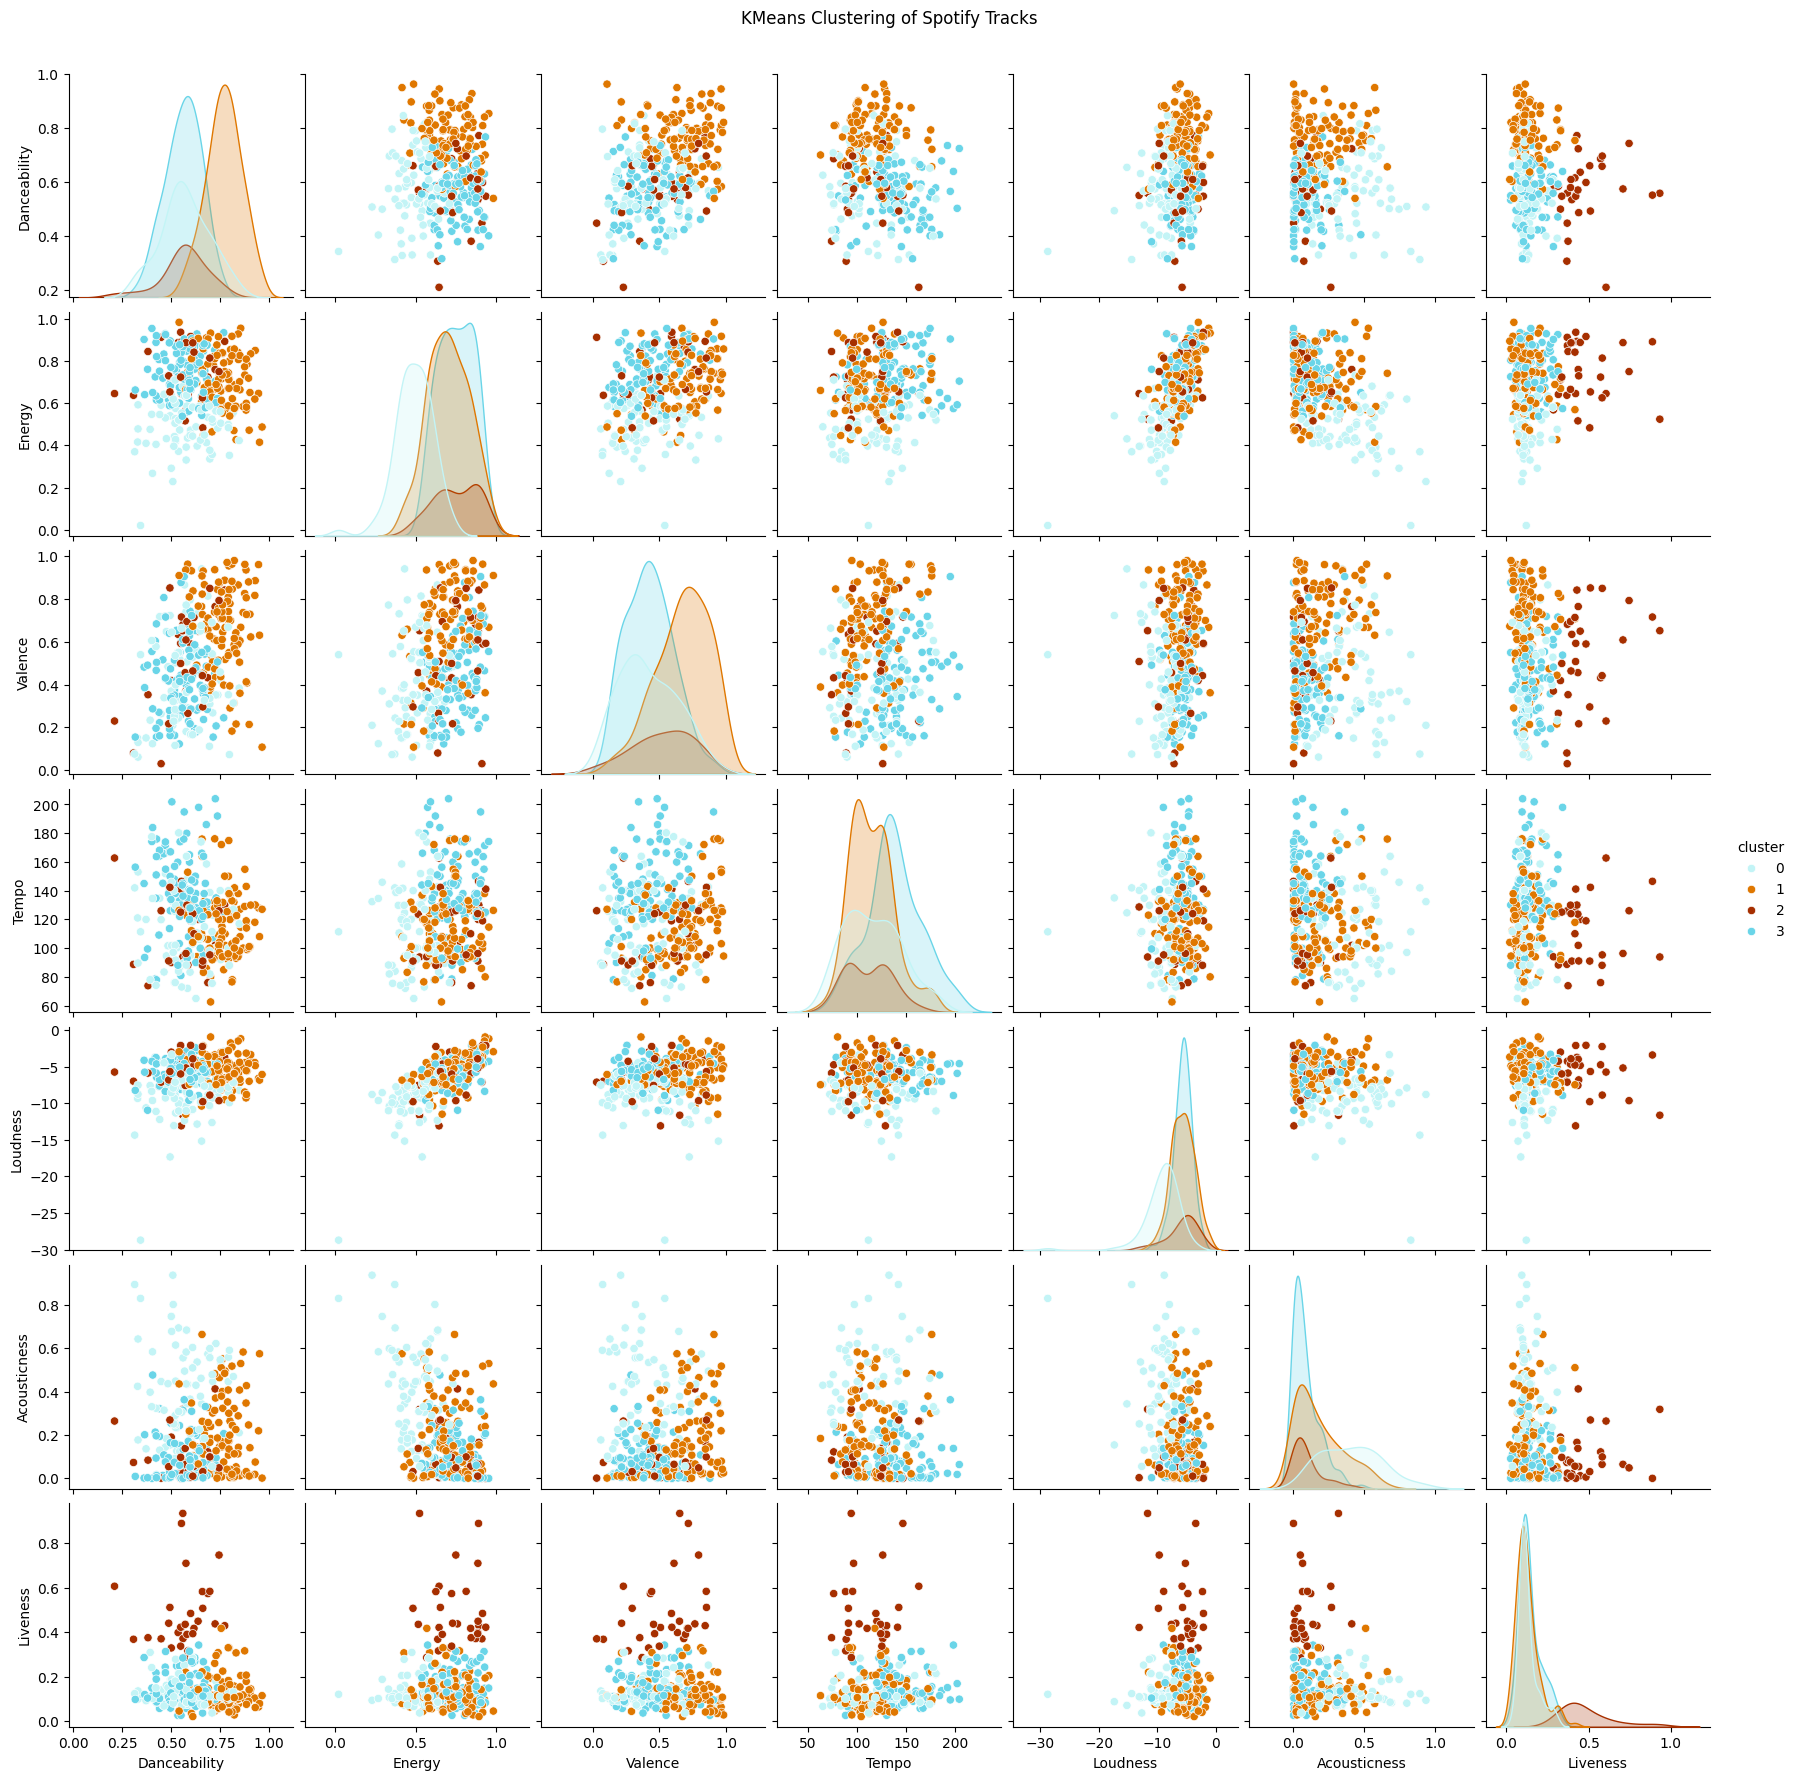

In [ ]:
from met_brewer import met_brew
colors = met_brew(name="Homer1", n=4)

kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels back to the original DataFrame
spotify_df['cluster'] = kmeans.labels_

# Add cluster column to the numerical features for plotting
kmeans_features['cluster'] = kmeans.labels_

# Plot
sns.pairplot(kmeans_features, hue='cluster', palette=colors)
plt.suptitle('KMeans Clustering of Spotify Tracks', y=1.02)
plt.show()

#Feature Engineering

In [ ]:
#extract language
prefix_map = {
    'k': 'Korean',
    'c': 'Chinese',
    'mando': 'Chinese',
    'j': 'Japanese',
    'french': 'French',
    'latin': 'Spanish'
}

spotify_single_genre['Language'] = spotify_single_genre['Genre'].str.extract(r'^([a-z])[-\s]')
spotify_single_genre['Language'] = spotify_single_genre['Genre'].str.extract(r'^(\w+)', expand=False).str.lower()
spotify_single_genre['Language'] = spotify_single_genre['Language'].map(prefix_map)
spotify_single_genre['Language'] = spotify_single_genre['Language'].fillna('English')

#year
spotify_single_genre['Release Date'] = pd.to_datetime(
    spotify_single_genre['Release Date'],
    format='mixed',
    errors='coerce'  # handle bad/missing values
)
spotify_single_genre['year'] = spotify_single_genre['Release Date'].dt.year

#extract if from a TV show/movie
spotify_single_genre['is_cast'] = spotify_single_genre['Artist Name(s)'].str.contains('Cast', case=False, na=False).astype(int)

#make explicit feature
spotify_single_genre['explicit'] = spotify_single_genre['Explicit'].astype(int)


In [ ]:
#compress genres to more
from sklearn.preprocessing import LabelEncoder

# spotify_single_genre = spotify_genres.drop_duplicates(subset=['track'])
spotify_single_genre['Broad Genre'] = spotify_single_genre['Genre']

genres = ['hip hop', 'k-pop', 'trap', 'rap', 'reggae', 'r&b', 'dance', 'indie', 'rock', 'pop',
          'electro', 'latin', 'metal', 'country', 'musical', 'alternative', 'house','edm','punk']

for genre in genres:
    mask = spotify_single_genre['Genre'].str.contains(genre, case=False, na=False)
    spotify_single_genre.loc[mask, 'Broad Genre'] = genre
#encode genre as label as well as user added (y variable)
spotify_single_genre['Genre Encoded'] = LabelEncoder().fit_transform(spotify_single_genre['Genre'])
spotify_single_genre['user_encoded'] = LabelEncoder().fit_transform(spotify_single_genre['Added by'])
spotify_single_genre['Language Encoded'] = LabelEncoder().fit_transform(spotify_single_genre['Language'])
spotify_single_genre.head(20)

,Track URI,track,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Explicit,Added At,Record Label,...,Time Signature,Genre,Added by,Broad Genre,Genre Encoded,user_encoded,Language,Language Encoded,year,is_cast
0,spotify:track:2OMjHcniFxzijWX7EaBrXE,Emergence,Even In Arcadia,Sleep Token,2025-05-09,386253,82,False,2025-06-02T22:15:36Z,Sleep Token/RCA Records,...,4,progressive metal,jonathan pipping,metal,64,7,English,0,2025,0
1,spotify:track:5czjjnbTatyFal33a9h1aN,Guess Who's Back,The 18th Letter / The Book Of Life,Rakim,1996-11-04,250906,60,False,2025-06-03T21:18:58Z,Universal Records,...,4,east coast hip hop,jonathan pipping,hip hop,22,7,English,0,1996,0
2,spotify:track:4IU1RL4BKvFyXtbTwaHAvW,Ventura Highway,Homecoming,"America,George Martin",1972-01-01,211680,82,False,2025-06-04T19:52:08Z,Warner Records,...,4,yacht rock,Matt,rock,82,4,English,0,1972,0
3,spotify:track:1x1XQqhBViz4opcpwc7FVs,Reelin' In The Years,Can't Buy A Thrill,Steely Dan,1972-11-01,277467,76,False,2025-06-04T19:52:13Z,Geffen,...,4,yacht rock,Matt,rock,82,4,English,0,1972,0
4,spotify:track:2LXISHBkx8FyoxCBkckh19,Do It Again,Can't Buy A Thrill,Steely Dan,1972-11-01,357041,77,False,2025-06-04T19:52:18Z,Geffen,...,4,yacht rock,Matt,rock,82,4,English,0,1972,0
5,spotify:track:608xszaAxVh4m7NcKJiAbF,One of These Nights - 2013 Remaster,One of These Nights (2013 Remaster),Eagles,1975-06-10,291685,79,False,2025-06-04T19:52:26Z,Rhino/Elektra,...,4,classic rock,Matt,rock,14,4,English,0,1975,0
6,spotify:track:4yugZvBYaoREkJKtbG08Qr,Take It Easy - 2013 Remaster,Eagles (2013 Remaster),Eagles,1972-06-01,211577,82,False,2025-06-04T19:52:34Z,Rhino/Elektra,...,4,classic rock,Matt,rock,14,4,English,0,1972,0
7,spotify:track:5lQKRR3MdJLtAwNBiT8Cq0,Lyin' Eyes - 2013 Remaster,One of These Nights (2013 Remaster),Eagles,1975-06-10,381998,74,False,2025-06-04T19:52:35Z,Rhino/Elektra,...,4,classic rock,Matt,rock,14,4,English,0,1975,0
8,spotify:track:4JGKZS7h4Qa16gOU3oNETV,Dreams,Everybody Else Is Doing It So Why Can't We?,The Cranberries,1993-03-01,271560,84,False,2025-06-04T22:30:00Z,Island Records,...,4,alternative rock,victoria,alternative,5,9,English,0,1993,0
9,spotify:track:3LlAyCYU26dvFZBDUIMb7a,Demons,Night Visions,Imagine Dragons,2012-09-04,175200,76,False,2025-06-04T22:40:17Z,Kid Ina Korner / Interscope,...,4,pop rock,Aiwen,pop,62,1,English,0,2012,0


In [ ]:
#extract year from given Release Date
spotify_single_genre['Release Date'] = pd.to_datetime(
    spotify_single_genre['Release Date'],
    format='mixed',
    errors='coerce'  # handle bad/missing values
)
spotify_single_genre['year'] = spotify_single_genre['Release Date'].dt.year

/tmp/ipython-input-294-4184807702.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-294-4184807702.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-294-4184807702.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-294-4184807702.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-294-4184807702.py:16: FutureWarning:



Passing `palette` without assigning `

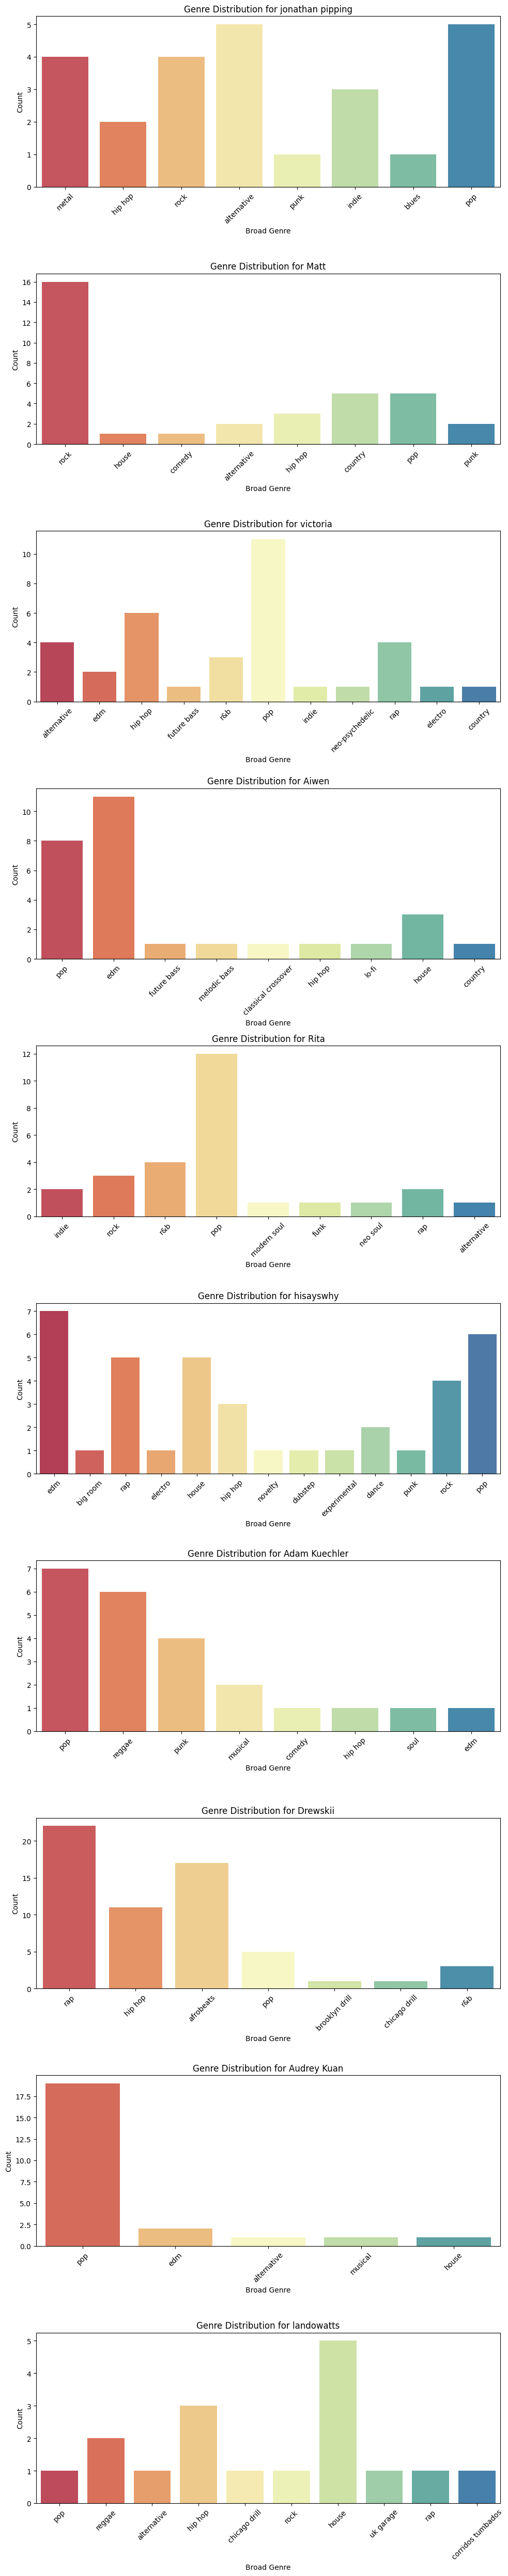

In [ ]:
# prompt: group by user, histogram of genre distribution for each user with one histogram per user

# Get unique users
users = spotify_single_genre['Added by'].unique()

# Create a figure and axes for each user
num_users = len(users)
fig, axes = plt.subplots(nrows=num_users, ncols=1, figsize=(10, 5 * num_users))

if num_users == 1:
    axes = [axes] # Ensure axes is iterable even if only one user

# Plot a histogram for each user
for i, user in enumerate(users):
    user_data = spotify_single_genre[spotify_single_genre['Added by'] == user]
    sns.countplot(data=user_data, x='Broad Genre', ax=axes[i], palette='Spectral')
    axes[i].set_title(f'Genre Distribution for {user}')
    axes[i].set_xlabel('Broad Genre')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipython-input-295-3804846210.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-295-3804846210.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-295-3804846210.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-295-3804846210.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-295-3804846210.py:10: FutureWarning:



Passing `palette` without assigning `

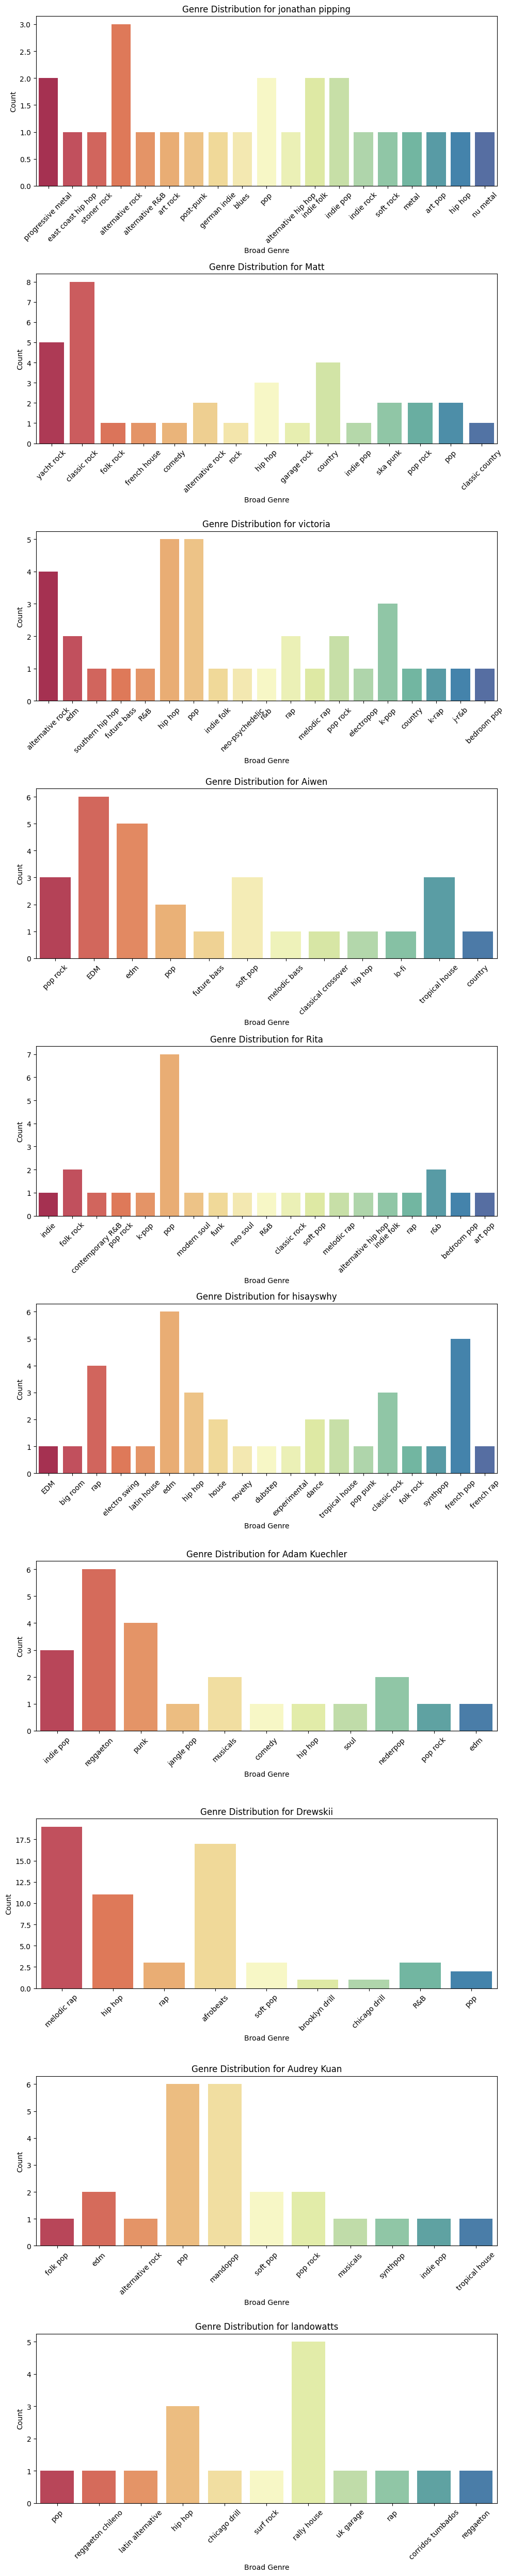

In [ ]:
num_users = len(users)
fig, axes = plt.subplots(nrows=num_users, ncols=1, figsize=(10, 5 * num_users))

if num_users == 1:
    axes = [axes] # Ensure axes is iterable even if only one user

# Plot a histogram for each user
for i, user in enumerate(users):
    user_data = spotify_single_genre[spotify_single_genre['Added by'] == user]
    sns.countplot(data=user_data, x='Genre', ax=axes[i], palette='Spectral')
    axes[i].set_title(f'Genre Distribution for {user}')
    axes[i].set_xlabel('Broad Genre')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#test train split and add supplemental data to train sets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

X = spotify_single_genre[['Danceability', 'Energy','Valence','Tempo', 'Loudness','Acousticness',
                          'Genre Encoded', 'Popularity', 'Speechiness', 'year', 'Language Encoded', 'is_cast', 'explicit']]
y = spotify_single_genre['user_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns, index=X_train.index)
# X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns, index=X_test.index)

# supplemental_x = supplemental_cleaned[X.columns]
# supplemental_x_scaled = pd.DataFrame(scaler.transform(supplemental_x), columns=X.columns, index=supplemental_x.index)
# supplemental_y = supplemental_cleaned['user_encoded']

# X_train = pd.concat([X_train, supplemental_x])
# y_train = pd.concat([y_train, supplemental_y])
X_train

,Danceability,Energy,Valence,Tempo,Loudness,Acousticness,Genre Encoded,Popularity,Speechiness,year,Language Encoded,is_cast,explicit
105,0.842,0.927,0.866,138.004,-1.496,0.2880,58,74,0.0439,2005,0,0,0
201,0.590,0.562,0.561,140.835,-9.607,0.0637,78,10,0.0505,2018,0,0,0
75,0.551,0.839,0.604,131.043,-4.134,0.0260,63,73,0.0280,2024,0,0,0
313,0.760,0.733,0.611,111.975,-6.704,0.1500,60,63,0.0504,2012,0,0,0
15,0.470,0.530,0.426,151.859,-9.277,0.1440,77,38,0.0310,2024,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,0.688,0.518,0.314,116.714,-4.285,0.0642,49,85,0.0283,2005,1,0,0
22,0.721,0.880,0.655,110.021,-3.896,0.1910,45,83,0.0454,2007,1,0,0
23,0.591,0.289,0.733,76.391,-11.049,0.5680,52,73,0.0260,2073,1,0,0
24,0.417,0.812,0.419,82.002,-3.979,0.0154,45,2,0.0332,2024,1,0,0


# Random Forest

In [ ]:
#train w random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
#print user labels in order to see prediction strength on each user
user_labels = LabelEncoder().fit(spotify_single_genre['Added by'])
le_users = LabelEncoder()
y_encoded = le_users.fit_transform(spotify_df['Added by'])
print(le_users.classes_)

['Adam Kuechler' 'Aiwen' 'Audrey Kuan' 'Drewskii' 'Matt' 'Rita'
 'hisayswhy' 'jonathan pipping' 'landowatts' 'victoria']


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.425531914893617
              precision    recall  f1-score   support

           0       0.33      0.12      0.18         8
           1       0.44      0.57      0.50         7
           2       0.20      0.33      0.25         6
           3       0.50      0.95      0.65        19
           4       0.41      0.64      0.50        11
           5       0.00      0.00      0.00        11
           6       0.45      0.45      0.45        11
           7       0.50      0.11      0.18         9
           8       0.50      0.33      0.40         3
           9       0.50      0.11      0.18         9

    accuracy                           0.43        94
   macro avg       0.38      0.36      0.33        94
weighted avg       0.39      0.43      0.36        94



In [ ]:
!pip install optuna
import optuna
from sklearn.metrics import accuracy_score, log_loss
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'class_weight': 'balanced',
        'random_state': 42
    }

    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)  # unscaled features here

    y_pred_proba = model.predict_proba(X_test)
    return log_loss(y_test, y_pred_proba)

study_rf = optuna.create_study(direction='minimize')
study_rf.optimize(objective_rf, n_trials=100)

print("Best RF log loss:", study_rf.best_value)
print("Best RF params:", study_rf.best_params)

[I 2025-06-30 17:46:44,660] A new study created in memory with name: no-name-3d1479c4-3290-4e19-bc4c-d8c6c021a65d
[I 2025-06-30 17:46:47,894] Trial 0 finished with value: 1.964213574099866 and parameters: {'n_estimators': 358, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 1.964213574099866.
[I 2025-06-30 17:46:48,944] Trial 1 finished with value: 1.863926254744623 and parameters: {'n_estimators': 196, 'max_depth': 32, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 1 with value: 1.863926254744623.
[I 2025-06-30 17:46:51,115] Trial 2 finished with value: 1.9194711289045427 and parameters: {'n_estimators': 500, 'max_depth': 36, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 1 with value: 1.863926254744623.
[I 2025-06-30 17:46:52,580] Trial 3 finished with value: 1.8612627576931453 and parameters: {'n_estimators': 314, 'max_depth': 16, 'min_s

Best RF log loss: 1.7635865148823895
Best RF params: {'n_estimators': 464, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None}


In [ ]:

best_rf_params = study_rf.best_params
best_rf = RandomForestClassifier(**best_rf_params, random_state=42, class_weight='balanced')
best_rf.fit(X_train, y_train)
y_pred_proba = best_rf.predict_proba(X_test)
rf_hyper_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, rf_hyper_pred))
print("Log Loss:", log_loss(y_test, y_pred_proba))

Accuracy: 0.4148936170212766
Log Loss: 1.7635865148823895


In [ ]:
#create ensemble of 10 rfs
seeds = [42, 52, 62, 72, 82, 92, 102, 112, 122, 132]
rf_ensemble = []

for seed in seeds:
    rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=best_rf_params.get("max_depth", None),
        min_samples_split=best_rf_params.get("min_samples_split", 2),
        min_samples_leaf=best_rf_params.get("min_samples_leaf", 1),
        max_features=best_rf_params.get("max_features", "sqrt"),
        class_weight='balanced',
        random_state=seed
    )
    rf.fit(X_train, y_train)
    rf_ensemble.append(rf)

In [ ]:
#predict probabilities
probas = np.stack([rf.predict_proba(X_test) for rf in rf_ensemble], axis=0)
ensemble_proba_rf = np.mean(probas, axis=0)
ensemble_pred_rf = np.argmax(ensemble_proba_rf, axis=1)

In [ ]:
print("RF Ensemble Accuracy:", accuracy_score(y_test, ensemble_pred_rf))
print("RF Ensemble Log Loss:", log_loss(y_test, ensemble_proba_rf))
print("\nClassification Report:")
print(classification_report(y_test, ensemble_pred_rf, target_names=le_users.classes_))

RF Ensemble Accuracy: 0.40425531914893614
RF Ensemble Log Loss: 1.7907551961571928

Classification Report:
                  precision    recall  f1-score   support

   Adam Kuechler       0.33      0.38      0.35         8
           Aiwen       0.29      0.29      0.29         7
     Audrey Kuan       0.20      0.33      0.25         6
        Drewskii       0.60      0.95      0.73        19
            Matt       0.39      0.64      0.48        11
            Rita       0.00      0.00      0.00        11
       hisayswhy       0.40      0.36      0.38        11
jonathan pipping       0.33      0.11      0.17         9
      landowatts       0.50      0.33      0.40         3
        victoria       0.00      0.00      0.00         9

        accuracy                           0.40        94
       macro avg       0.30      0.34      0.31        94
    weighted avg       0.32      0.40      0.35        94



# XGBoost

In [ ]:
import xgboost as xgb
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

model = xgb.XGBClassifier(
    objective='multi:softmax',  # directly outputs predicted class
    num_class=len(le_users.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42

)
model.fit(X_train, y_train, sample_weight=sample_weights)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[17:50:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=10, num_parallel_tree=None, ...)

In [ ]:
xgb_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nClassification Report:")
print(classification_report(y_test, xgb_pred, target_names=le_users.classes_))

Accuracy: 0.35106382978723405

Classification Report:
                  precision    recall  f1-score   support

   Adam Kuechler       0.25      0.25      0.25         8
           Aiwen       0.18      0.29      0.22         7
     Audrey Kuan       0.22      0.33      0.27         6
        Drewskii       0.64      0.84      0.73        19
            Matt       0.38      0.45      0.42        11
            Rita       0.33      0.09      0.14        11
       hisayswhy       0.36      0.36      0.36        11
jonathan pipping       0.00      0.00      0.00         9
      landowatts       0.25      0.33      0.29         3
        victoria       0.00      0.00      0.00         9

        accuracy                           0.35        94
       macro avg       0.26      0.30      0.27        94
    weighted avg       0.31      0.35      0.32        94



In [ ]:
#randomized search hyperparameter tuning
# xgb_clf = xgb.XGBClassifier(
#     objective='multi:softprob',  # to get probability outputs for log loss
#     num_class=len(np.unique(y_train)),
#     use_label_encoder=False,
#     eval_metric='mlogloss',
#     random_state=42
# )

# xgb_param_dist = {
#     'n_estimators': [200, 250, 300],
#     'max_depth': [2, 3, 4],
#     'learning_rate': [0.001, 0.005, 0.01, 0.05],
#     'subsample': [0.2, 0.4, 0.6],
#     'colsample_bytree': [0.7, 0.8, 0.9]
# }

# xgb_cv = RandomizedSearchCV(
#     xgb_clf,
#     xgb_param_dist,
#     n_iter=25,
#     scoring='neg_log_loss',
#     cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# xgb_cv.fit(X_train, y_train)
# print("Best XGB Log Loss:", -xgb_cv.best_score_)
# print("Best XGB Params:", xgb_cv.best_params_)

In [ ]:

def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0)
    }

    model = xgb.XGBClassifier(
        **params,
        objective='multi:softprob',
        num_class=len(np.unique(y_train)),
        eval_metric='mlogloss',
        #use_label_encoder=False,
        random_state=42
    )
    model.fit(X_train, y_train, sample_weight=sample_weights)
    preds = model.predict_proba(X_test)
    return log_loss(y_test, preds)

study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=100)

[I 2025-06-30 17:50:16,958] A new study created in memory with name: no-name-6081e4bb-7c5f-441c-a50b-f74c823e251d
[I 2025-06-30 17:50:35,931] Trial 0 finished with value: 1.8365003368302903 and parameters: {'n_estimators': 499, 'max_depth': 7, 'learning_rate': 0.004189603465186949, 'subsample': 0.9061058576016053, 'colsample_bytree': 0.6164882675745621}. Best is trial 0 with value: 1.8365003368302903.
[I 2025-06-30 17:50:40,019] Trial 1 finished with value: 1.9517225642477884 and parameters: {'n_estimators': 174, 'max_depth': 8, 'learning_rate': 0.009521840189352423, 'subsample': 0.48101945869482676, 'colsample_bytree': 0.6346262915819741}. Best is trial 0 with value: 1.8365003368302903.
[I 2025-06-30 17:50:46,555] Trial 2 finished with value: 2.120253772801077 and parameters: {'n_estimators': 260, 'max_depth': 10, 'learning_rate': 0.0016271284697841385, 'subsample': 0.7962665042072787, 'colsample_bytree': 0.9575089958113713}. Best is trial 0 with value: 1.8365003368302903.
[I 2025-06-

In [ ]:
best_xgb_params = study_xgb.best_params
# 'n_estimators': 180, 'max_depth': 8, 'learning_rate': 0.03180155660405677, 'subsample': 0.8652160495290928, 'colsample_bytree': 0.5852114734859933
# best_xgb_params = xgb_cv.best_params_

In [ ]:
#fit best hyperparameter model
best_xgb = xgb.XGBClassifier(
    **best_xgb_params,
    objective='multi:softprob',
    num_class=len(np.unique(y_train)),
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
best_xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[17:57:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.40015859413627325, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.025716697246119535,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=345, n_jobs=None, num_class=10,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_proba = best_xgb.predict_proba(X_test)
xgb_hyper_pred = best_xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, xgb_hyper_pred))
print("Log Loss:", log_loss(y_test, y_pred_proba))

Accuracy: 0.4148936170212766
Log Loss: 1.7119702849316163


In [ ]:
# y_pred_proba = best_xgb.predict_proba(X_train)
# xgb_hyper_pred = best_xgb.predict(X_train)

# print("Accuracy:", accuracy_score(y_train, xgb_hyper_pred))
# print("Log Loss:", log_loss(y_train, y_pred_proba))

In [ ]:
X_test_copy = X_test.copy()
X_test_copy['actual_user'] = y_test.values
X_test_copy['predicted_user'] = xgb_hyper_pred
X_test_copy['Genre'] = spotify_single_genre.loc[X_test_copy.index, 'Genre']
X_test_copy['Added by'] = spotify_single_genre.loc[X_test_copy.index, 'Added by']

genre_by_user = X_test_copy.groupby('Added by')['Genre'].value_counts().unstack(fill_value=0)

X_test_copy[['Added by', 'actual_user', 'predicted_user', 'Genre']].head(30)

,Added by,actual_user,predicted_user,Genre
237,Adam Kuechler,0,0,reggaeton
9,Aiwen,1,2,pop rock
58,Aiwen,1,1,melodic bass
62,Adam Kuechler,0,6,comedy
25,Matt,4,4,yacht rock
65,hisayswhy,6,6,edm
97,jonathan pipping,7,2,indie folk
193,jonathan pipping,7,2,pop
272,hisayswhy,6,8,tropical house
47,hisayswhy,6,8,rap


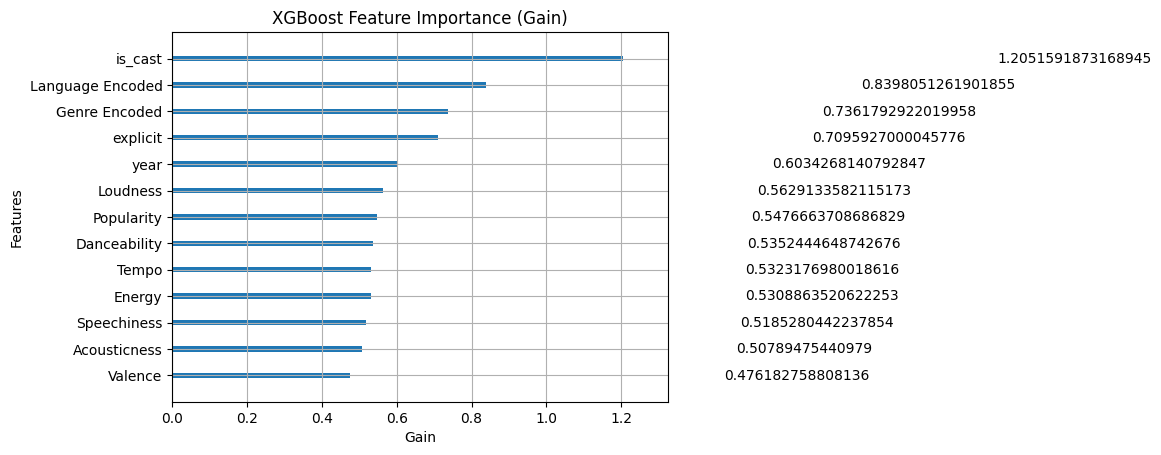

In [ ]:
xgb.plot_importance(best_xgb, importance_type='gain', xlabel='Gain')
plt.title("XGBoost Feature Importance (Gain)")
plt.show()

In [ ]:
xgb_ensemble = []

for seed in seeds:
    xgb_model = xgb.XGBClassifier(
        **best_xgb_params,
        objective='multi:softprob',
        num_class=len(np.unique(y_train)),
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=seed
    )
    xgb_model.fit(X_train, y_train, sample_weight=sample_weights)
    xgb_ensemble.append(xgb_model)

# Average probabilities
probas_xgb = np.stack([model.predict_proba(X_test) for model in xgb_ensemble], axis=0)
ensemble_proba_xgb = np.mean(probas_xgb, axis=0)
ensemble_pred_xgb = np.argmax(ensemble_proba_xgb, axis=1)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[17:57:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[17:57:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[17:57:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[17:57:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[17:57:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[17:57:49] WARNING: /workspace

In [ ]:
print("xgb Ensemble Accuracy:", accuracy_score(y_test, ensemble_pred_xgb))
print("xgb Ensemble Log Loss:", log_loss(y_test, ensemble_proba_xgb))
print("\nClassification Report:")
print(classification_report(y_test, ensemble_pred_xgb, target_names=le_users.classes_))

xgb Ensemble Accuracy: 0.39361702127659576
xgb Ensemble Log Loss: 1.703527685482857

Classification Report:
                  precision    recall  f1-score   support

   Adam Kuechler       0.38      0.38      0.38         8
           Aiwen       0.50      0.43      0.46         7
     Audrey Kuan       0.18      0.33      0.24         6
        Drewskii       0.68      0.89      0.77        19
            Matt       0.50      0.64      0.56        11
            Rita       0.00      0.00      0.00        11
       hisayswhy       0.27      0.27      0.27        11
jonathan pipping       0.25      0.11      0.15         9
      landowatts       0.25      0.33      0.29         3
        victoria       0.00      0.00      0.00         9

        accuracy                           0.39        94
       macro avg       0.30      0.34      0.31        94
    weighted avg       0.34      0.39      0.36        94



# Multinom logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logreg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=10000,
    random_state=42,
    class_weight='balanced',
    C=0.1
)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test_scaled)

print("LogReg Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("LogReg Log Loss:", log_loss(y_test, y_proba_logreg))

LogReg Accuracy: 0.2978723404255319
LogReg Log Loss: 2.018674994182879


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



In [ ]:
# #hyperparameter tuning

# logreg = LogisticRegression(
#     multi_class='multinomial',
#     solver='lbfgs',
#     max_iter=1000,
#     random_state=42
# )

# logreg_param_dist = {
#     'C': np.logspace(-4, 2, 20)
# }

# logreg_cv = RandomizedSearchCV(
#     logreg,
#     param_distributions=logreg_param_dist,
#     n_iter=20,
#     scoring='neg_log_loss',
#     cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
#     n_jobs=-1,
#     random_state=42,
#     verbose=2
# )

# logreg_cv.fit(X_train_final, y_train_final)

# print("Best LogReg Log Loss:", -logreg_cv.best_score_)
# print("Best LogReg Params:", logreg_cv.best_params_)

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

def objective_logreg(trial):
    # Choose penalty type
    penalty_choice = trial.suggest_categorical('penalty', ['l2', 'l1', 'elasticnet', 'none'])
    penalty = None if penalty_choice == 'none' else penalty_choice

    # Choose solver based on penalty
    if penalty_choice == 'l1':
        solver = 'saga'
    elif penalty_choice == 'elasticnet':
        solver = 'saga'
    else:
        solver = 'lbfgs'

    # Suggest C (inverse of regularization strength)
    C = trial.suggest_loguniform('C', 1e-4, 1e2)

    # Elasticnet-specific parameter
    l1_ratio = None
    if penalty == 'elasticnet':
        l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)

    model = LogisticRegression(
        penalty=penalty,
        solver=solver,
        C=C,
        l1_ratio=l1_ratio,
        max_iter=5000,
        class_weight='balanced',
        random_state=42
    )

    # Evaluate log loss via cross-validated predictions
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    y_proba = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')

    return log_loss(y_train, y_proba)

study_logreg = optuna.create_study(direction='minimize')
study_logreg.optimize(objective_logreg, n_trials=50)

print("Best LogReg Log Loss:", study_logreg.best_value)
print("Best LogReg Params:", study_logreg.best_params)

[I 2025-06-30 17:58:11,720] A new study created in memory with name: no-name-f4e88338-3b07-4d37-a66f-bbcb316c2688
/tmp/ipython-input-349-2195813067.py:19: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

Best LogReg Log Loss: 2.2518130258650095
Best LogReg Params: {'penalty': 'none', 'C': 0.0029128097282554947}


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)


# Step 4: Fit logistic regression model
logreg_poly = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    max_iter=5000,
    multi_class='multinomial',
    class_weight='balanced',
    random_state=42
)
logreg_poly.fit(X_train_poly, y_train)

# Step 5: Predict and etestuate
y_pred_poly = logreg_poly.predict(X_test_poly)
y_proba_poly = logreg_poly.predict_proba(X_test_poly)

print("LogReg + Poly Accuracy:", accuracy_score(y_test, y_pred_poly))
print("LogReg + Poly Log Loss:", log_loss(y_test, y_proba_poly))


LogReg + Poly Accuracy: 0.2872340425531915
LogReg + Poly Log Loss: 3.5009313562019595


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



# CatBoost

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

cat = CatBoostClassifier(
    iterations=200,
    loss_function='MultiClass',
    verbose=0,
    random_seed=42
)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)
y_proba_cat = cat.predict_proba(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print("CatBoost Log Loss:", log_loss(y_test, y_proba_cat))

CatBoost Accuracy: 0.39361702127659576
CatBoost Log Loss: 1.8167133276082459


In [ ]:
# cat = CatBoostClassifier(
#     loss_function='MultiClass',
#     verbose=0,
#     random_seed=42
# )

# cat_param_dist = {
#     'iterations': [300, 400, 500],
#     'depth': [1, 2, 3, 5],                      # CatBoost equivalent to max_depth
#     'learning_rate': [0.01, 0.05, 0.1, 0.5],
#     'bootstrap_type': ['Bernoulli'],
#     'subsample': [0.2, 0.4, 0.6],
#     'colsample_bylevel': [.9, 1, 1.2]     # CatBoost equivalent to colsample_bytree
# }

# cat_cv = RandomizedSearchCV(
#     cat,
#     param_distributions=cat_param_dist,
#     n_iter=25,
#     scoring='neg_log_loss',
#     cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
#     n_jobs=-1,
#     random_state=42,
#     verbose=2
# )

# cat_cv.fit(X_train, y_train)

# print("Best CatBoost Log Loss:", -cat_cv.best_score_)
# print("Best CatBoost Params:", cat_cv.best_params_)

In [ ]:
def objective_cat(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 500),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.4, 1.0),
        'bootstrap_type': 'Bernoulli'
    }

    model = CatBoostClassifier(
        **params,
        loss_function='MultiClass',
        random_seed=42,
        verbose=0
    )
    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)
    return log_loss(y_test, preds)

study_cat = optuna.create_study(direction='minimize')
study_cat.optimize(objective_cat, n_trials=50)

best_cat_params = study_cat.best_params

[I 2025-06-30 18:07:20,355] A new study created in memory with name: no-name-f5fc1530-5b65-47d7-8891-99e9c744b007
[I 2025-06-30 18:07:39,985] Trial 0 finished with value: 2.0127970498752243 and parameters: {'iterations': 108, 'depth': 9, 'learning_rate': 0.032458718276551946, 'subsample': 0.63516217889664, 'colsample_bylevel': 0.7097516203677079}. Best is trial 0 with value: 2.0127970498752243.
[I 2025-06-30 18:07:40,793] Trial 1 finished with value: 2.206645345132017 and parameters: {'iterations': 164, 'depth': 3, 'learning_rate': 0.004092311839860206, 'subsample': 0.5036320755931725, 'colsample_bylevel': 0.5697461949220041}. Best is trial 0 with value: 2.0127970498752243.
[I 2025-06-30 18:07:46,759] Trial 2 finished with value: 2.1105404336674636 and parameters: {'iterations': 476, 'depth': 4, 'learning_rate': 0.0028461554938082885, 'subsample': 0.8755797713096913, 'colsample_bylevel': 0.9016978013509017}. Best is trial 0 with value: 2.0127970498752243.
[I 2025-06-30 18:07:48,507] Tr

In [ ]:
best_cat_params = study_cat.best_params
best_cat = CatBoostClassifier(
    **study_cat.best_params,
    loss_function='MultiClass',
    bootstrap_type='Bernoulli',
    random_seed=42,
    verbose=0
)
best_cat.fit(X_train, y_train)
y_pred_cat = best_cat.predict(X_test)
y_proba_cat = best_cat.predict_proba(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print("CatBoost Log Loss:", log_loss(y_test, y_proba_cat))

CatBoost Accuracy: 0.3829787234042553
CatBoost Log Loss: 1.7122753049177708


In [ ]:
cat_ensemble = []

for seed in seeds:
    cat_model = CatBoostClassifier(
        **study_cat.best_params,
        loss_function='MultiClass',
        random_seed=seed,
        bootstrap_type='Bernoulli',
        verbose=0
    )
    cat_model.fit(X_train, y_train)
    cat_ensemble.append(cat_model)

# Average probabilities
probas_cat = np.stack([model.predict_proba(X_test) for model in cat_ensemble], axis=0)
ensemble_proba_cat = np.mean(probas_cat, axis=0)
ensemble_pred_cat = np.argmax(ensemble_proba_cat, axis=1)

In [ ]:
print("cat Ensemble Accuracy:", accuracy_score(y_test, ensemble_pred_cat))
print("cat Ensemble Log Loss:", log_loss(y_test, ensemble_proba_cat))
print("\nClassification Report:")
print(classification_report(y_test, ensemble_pred_cat, target_names=le_users.classes_))

cat Ensemble Accuracy: 0.39361702127659576
cat Ensemble Log Loss: 1.7128796375731836

Classification Report:
                  precision    recall  f1-score   support

   Adam Kuechler       0.40      0.25      0.31         8
           Aiwen       0.31      0.57      0.40         7
     Audrey Kuan       0.17      0.33      0.22         6
        Drewskii       0.58      0.95      0.72        19
            Matt       0.43      0.55      0.48        11
            Rita       0.00      0.00      0.00        11
       hisayswhy       0.33      0.27      0.30        11
jonathan pipping       0.33      0.11      0.17         9
      landowatts       0.50      0.33      0.40         3
        victoria       0.00      0.00      0.00         9

        accuracy                           0.39        94
       macro avg       0.31      0.34      0.30        94
    weighted avg       0.32      0.39      0.34        94



# Ensemble stacking

In [ ]:
proba_rf  = best_rf.predict_proba(X_test)
proba_xgb = best_xgb.predict_proba(X_test)
proba_cat = best_cat.predict_proba(X_test)
ensemble_proba = (.3*proba_rf + .4*proba_xgb + .3*proba_cat)
ensemble_pred = np.argmax(ensemble_proba, axis=1)
print("Ensemble Accuracy:", accuracy_score(y_test, ensemble_pred))
print("Ensemble Log Loss:", log_loss(y_test, ensemble_proba))

print("\nClassification Report:")
print(classification_report(y_test, ensemble_pred, target_names=le_users.classes_))

Ensemble Accuracy: 0.425531914893617
Ensemble Log Loss: 1.6977515142469028

Classification Report:
                  precision    recall  f1-score   support

   Adam Kuechler       0.50      0.38      0.43         8
           Aiwen       0.44      0.57      0.50         7
     Audrey Kuan       0.27      0.50      0.35         6
        Drewskii       0.60      0.95      0.73        19
            Matt       0.43      0.55      0.48        11
            Rita       0.00      0.00      0.00        11
       hisayswhy       0.40      0.36      0.38        11
jonathan pipping       0.33      0.11      0.17         9
      landowatts       0.25      0.33      0.29         3
        victoria       0.00      0.00      0.00         9

        accuracy                           0.43        94
       macro avg       0.32      0.37      0.33        94
    weighted avg       0.35      0.43      0.37        94



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning:

The y_pred values do not sum to one. Make sure to pass probabilities.



In [ ]:
#optimization
def objective_weights(trial):
    # Suggest weights for each model
    w_rf = trial.suggest_float('w_rf', 0, 1)
    w_xgb = trial.suggest_float('w_xgb', 0, 1)
    w_cat = trial.suggest_float('w_cat', 0, 1)

    # Normalize to sum to 1
    total = w_rf + w_xgb + w_cat
    w_rf /= total
    w_xgb /= total
    w_cat /= total

    # Combine predictions
    ensemble_proba = w_rf * proba_rf + w_xgb * proba_xgb + w_cat * proba_cat

    # Evaluate log loss
    return log_loss(y_test, ensemble_proba)

study = optuna.create_study(direction='minimize')
study.optimize(objective_weights, n_trials=100)

best_weights = study.best_params
print("Best Weights:", best_weights)
print("Best Log Loss:", study.best_value)

[I 2025-06-30 18:14:50,938] A new study created in memory with name: no-name-43b1f049-a0fc-48cf-b7df-38195c16ba79
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning:

The y_pred values do not sum to one. Make sure to pass probabilities.

[I 2025-06-30 18:14:50,949] Trial 0 finished with value: 1.6934104882854017 and parameters: {'w_rf': 0.015036429696925091, 'w_xgb': 0.5247424749035355, 'w_cat': 0.943860179805895}. Best is trial 0 with value: 1.6934104882854017.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning:

The y_pred values do not sum to one. Make sure to pass probabilities.

[I 2025-06-30 18:14:50,956] Trial 1 finished with value: 1.7001818596918619 and parameters: {'w_rf': 0.31325846166514915, 'w_xgb': 0.5393499993792809, 'w_cat': 0.06172483512150895}. Best is trial 0 with value: 1.6934104882854017.
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:3001: UserWarning:



Best Weights: {'w_rf': 0.005615280494000233, 'w_xgb': 0.5803703560479687, 'w_cat': 0.5166745867339536}
Best Log Loss: 1.6912519131334702


In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

w_rf  = best_weights['w_rf']
w_xgb = best_weights['w_xgb']
w_cat = best_weights['w_cat']

total = w_rf + w_xgb + w_cat
normalized_weights = (w_rf / total, w_xgb / total, w_cat / total)

class WeightedEnsemble(BaseEstimator, ClassifierMixin):
    def __init__(self, rf_model, xgb_model, cat_model, weights=weights):
        self.rf_model = rf_model
        self.xgb_model = xgb_model
        self.cat_model = cat_model
        self.weights = weights

    def predict_proba(self, X):
        p_rf = self.rf_model.predict_proba(X)
        p_xgb = self.xgb_model.predict_proba(X)
        p_cat = self.cat_model.predict_proba(X)
        w_rf, w_xgb, w_cat = self.weights
        return w_rf * p_rf + w_xgb * p_xgb + w_cat * p_cat

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

final_model = WeightedEnsemble(
    rf_model=best_rf,
    xgb_model=best_xgb,
    cat_model=best_cat,
    weights=weights
)